In [114]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import data

In [115]:
#btc options data
df=pd.read_csv('data/btc_data.csv', sep=",", index_col=0)
#df.drop(columns=['Unnamed: 0', 'interest_rate'], inplace=True)

In [116]:
from datetime import datetime

btc_options_filtered = df[['underlying_price', 'Strike Price', 'mark_iv', 'Expiration Date', "mark_price"]]
btc_options_filtered.columns = ['Spot Price', 'Strike Price', 'Implied Volatility', 'Expiration Date',"mark_price"]

# Parse the expiration dates and calculate time to expiration (in years)
today = datetime.today()

btc_options_filtered['Time to Expiration'] = btc_options_filtered['Expiration Date'].apply(lambda x: (datetime.strptime(x, '%d%b%y') - today).days / 365)

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_23196\756559422.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_23196\756559422.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
data= df 

In [118]:
df = btc_options_filtered

In [119]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize

# Black-Scholes call option pricing formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate the implied volatility using numerical method
def implied_volatility(S, K, T, r, market_price):
    # Define a function that calculates the difference between market price and BSM price
    def objective_function(sigma):
        return (black_scholes_call(S, K, T, r, sigma) - market_price) ** 2
    
    # Initial guess for volatility
    initial_guess = 0.2
    
    # Use 'minimize' from scipy to minimize the objective function
    result = minimize(objective_function, initial_guess, bounds=[(0.0001, 5.0)], method='L-BFGS-B')
    
    return result.x[0]

# Assuming a constant risk-free rate of 3% (0.03)
constant_risk_free_rate = 0.015
# Add a new column for recalculated implied volatility, using the constant RFR
df['Recalculated Implied Volatility'] = df.apply(lambda row: implied_volatility(
    row['Spot Price'], row['Strike Price'], row['Time to Expiration'], constant_risk_free_rate, row['mark_price']
), axis=1)

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_23196\2176959119.py:8: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_23196\2176959119.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



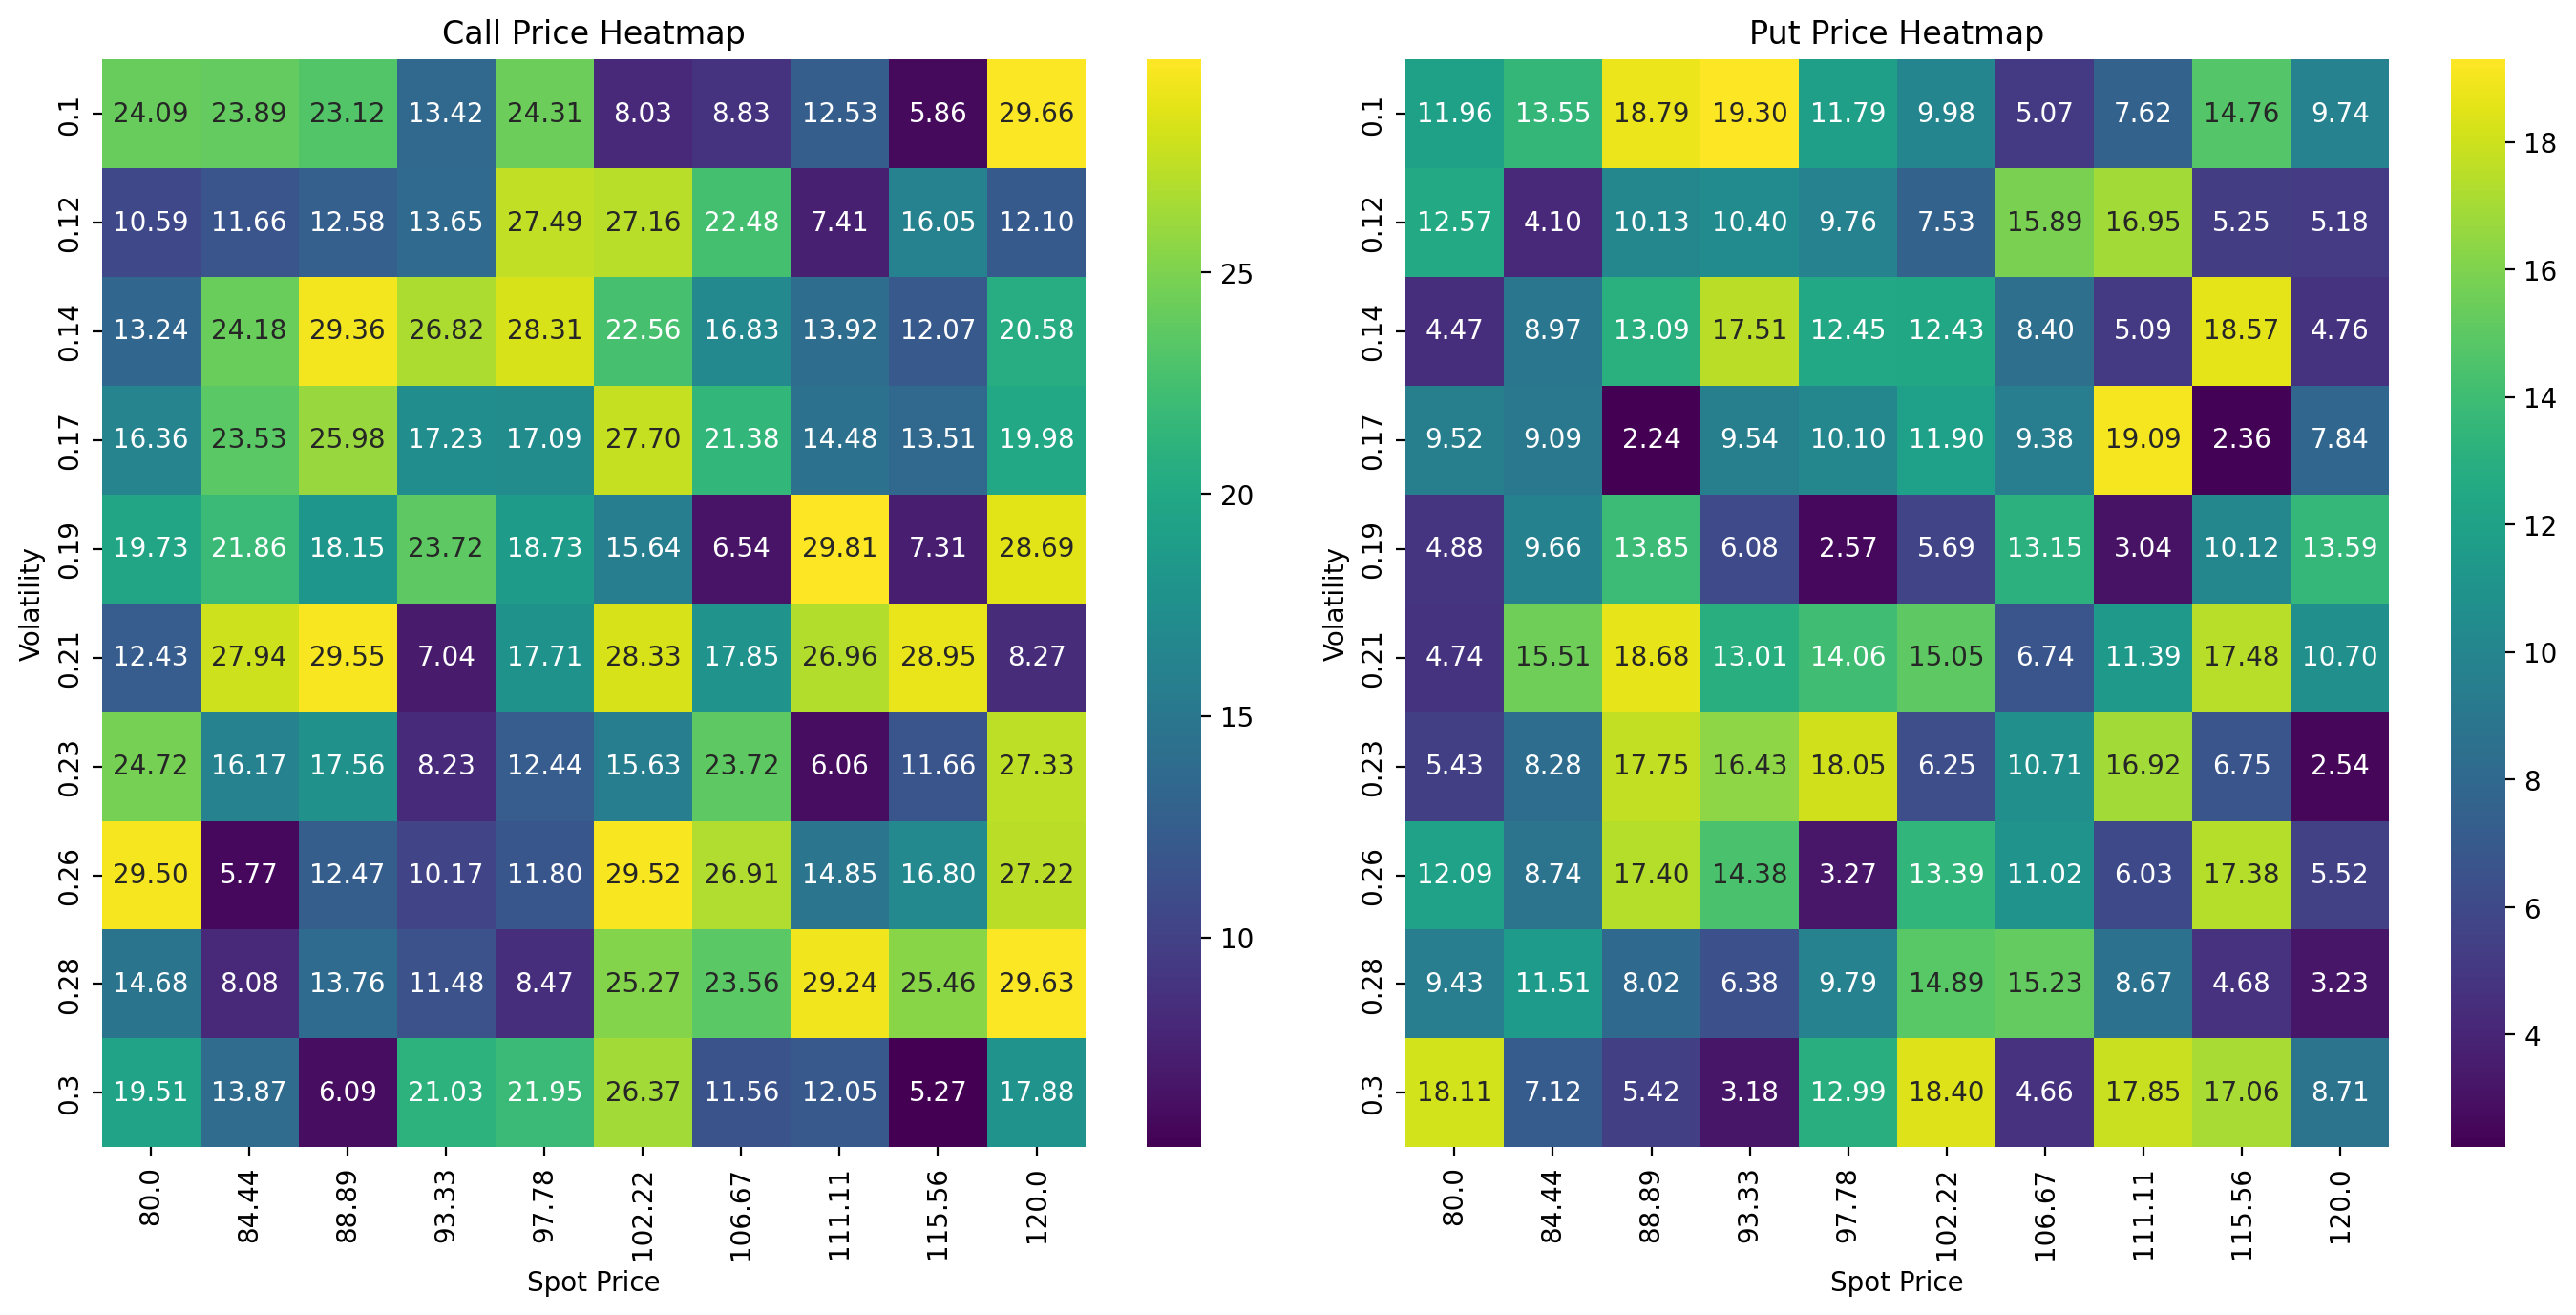

In [55]:
# Assuming we already have the required data for both call and put prices
# We will simulate the put prices in this case, or if you have the data, we could use it instead.

# Generating some mock data for put prices for demonstration purposes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data for demonstration
volatility = np.linspace(0.1, 0.3, 10)
spot_price = np.linspace(80, 120, 10)
call_prices = np.random.uniform(5, 30, (10, 10))
put_prices = np.random.uniform(2, 20, (10, 10))

# Create two subplots: one for call prices and one for put prices
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Call price heatmap
sns.heatmap(call_prices, annot=True, fmt=".2f", cmap="viridis", ax=ax[0], 
            xticklabels=np.round(spot_price, 2), yticklabels=np.round(volatility, 2))
ax[0].set_title("Call Price Heatmap")
ax[0].set_xlabel("Spot Price")
ax[0].set_ylabel("Volatility")

# Put price heatmap
sns.heatmap(put_prices, annot=True, fmt=".2f", cmap="viridis", ax=ax[1], 
            xticklabels=np.round(spot_price, 2), yticklabels=np.round(volatility, 2))
ax[1].set_title("Put Price Heatmap")
ax[1].set_xlabel("Spot Price")
ax[1].set_ylabel("Volatility")

plt.tight_layout()
plt.show()


### use aapl, options data  -- below 


In [39]:
import yfinance as yf
import pandas as pd

# Specify the stock ticker
ticker = 'AAPL'  # You can change this to any other stock symbol

# Download the ticker object
stock = yf.Ticker(ticker)

# Get expiration dates for the option chain
expiration_dates = stock.options
print(f"Available expiration dates: {expiration_dates}")

# Select an expiration date (e.g., the first available)
expiration = expiration_dates[0]

# Fetch the option chain for the selected expiration date
option_chain = stock.option_chain(expiration)

# Extract call data
calls = option_chain.calls

# Save the calls data to a Pandas DataFrame
calls_df = pd.DataFrame(calls)



Available expiration dates: ('2024-10-25', '2024-11-01', '2024-11-08', '2024-11-15', '2024-11-22', '2024-11-29', '2024-12-20', '2025-01-17', '2025-02-21', '2025-03-21', '2025-04-17', '2025-06-20', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18', '2027-01-15')


In [41]:
# Get today's date as a timezone-naive Timestamp
today = pd.Timestamp(datetime.now()).tz_localize(None)

# Convert lastTradeDate to timezone-naive and calculate Time to Expiration in years
calls_df['Time to Expiration'] = calls_df['lastTradeDate'].apply(
    lambda x: (x.tz_localize(None) - today).days / 365
)


In [46]:
calls_df.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Time to Expiration
0,AAPL241025C00100000,2024-10-21 13:30:08+00:00,100.0,135.05,130.20,131.10,0.0,0.0,3,9,4.398442,True,REGULAR,USD,-0.010959
1,AAPL241025C00105000,2024-10-21 13:35:25+00:00,105.0,130.35,125.30,126.10,0.0,0.0,1,2,4.398442,True,REGULAR,USD,-0.010959
2,AAPL241025C00130000,2024-10-23 17:58:15+00:00,130.0,98.19,100.25,101.00,0.0,0.0,3,4,2.968753,True,REGULAR,USD,-0.002740
3,AAPL241025C00135000,2024-10-23 18:44:28+00:00,135.0,94.40,95.15,96.05,0.0,0.0,3,3,2.625003,True,REGULAR,USD,-0.002740
4,AAPL241025C00140000,2024-10-18 14:08:51+00:00,140.0,95.79,90.20,91.00,0.0,0.0,1,3,2.453129,True,REGULAR,USD,-0.019178


In [47]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize

# Assuming a constant risk-free rate of 3% (0.03)
constant_risk_free_rate = 0.015




# Add a new column for recalculated implied volatility, using the constant RFR
calls_df['Recalculated Implied Volatility'] = calls_df.apply(lambda row: implied_volatility(
    row['lastPrice'],  # Spot Price
    row['strike'],     # Strike Price
    row['Time to Expiration'],  # Time to Expiration (in years)
    constant_risk_free_rate,  # Risk-free rate
    row['lastPrice']  # Use 'lastPrice' as the option price
), axis=1)

# Display the updated DataFrame
print(calls_df[['contractSymbol', 'strike', 'lastPrice', 'Recalculated Implied Volatility']].head())


        contractSymbol  strike  lastPrice  Recalculated Implied Volatility
0  AAPL241025C00100000   100.0     135.05                              0.2
1  AAPL241025C00105000   105.0     130.35                              0.2
2  AAPL241025C00130000   130.0      98.19                              0.2
3  AAPL241025C00135000   135.0      94.40                              0.2
4  AAPL241025C00140000   140.0      95.79                              0.2


C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_30200\590361568.py:8: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_30200\590361568.py:9: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_30200\590361568.py:8: RuntimeWarning:

divide by zero encountered in divide



In [48]:
import plotly.graph_objects as go
import numpy as np

# Extracting relevant data for the surface plot
strikes = calls_df['strike'].values
times_to_expiration = calls_df['Time to Expiration'].values
implied_vols = calls_df['Recalculated Implied Volatility'].values

# Create meshgrid for 3D plotting
X, Y = np.meshgrid(strikes, times_to_expiration)
Z = np.tile(implied_vols, (len(times_to_expiration), 1))

# Create the interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

fig.update_layout(title='Interactive Implied Volatility Surface', autosize=False,
                  width=700, height=700,
                  scene = dict(
                      xaxis_title='Strike Price',
                      yaxis_title='Time to Expiry',
                      zaxis_title='Recalculated Implied Volatility'))
fig.show()


In [42]:
import plotly.graph_objects as go
import numpy as np

# Extracting relevant data for the surface plot
strikes = calls_df['strike'].values
times_to_expiration = calls_df['Time to Expiration'].values
implied_vols = calls_df['impliedVolatility'].values

# Create meshgrid for 3D plotting
X, Y = np.meshgrid(strikes, times_to_expiration)
Z = np.tile(implied_vols, (len(times_to_expiration), 1))

# Create the interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

fig.update_layout(title='Interactive Implied Volatility Surface', autosize=False,
                  width=700, height=700,
                  scene = dict(
                      xaxis_title='Strike Price',
                      yaxis_title='Time to Expiry',
                      zaxis_title='Recalculated Implied Volatility'))
fig.show()
